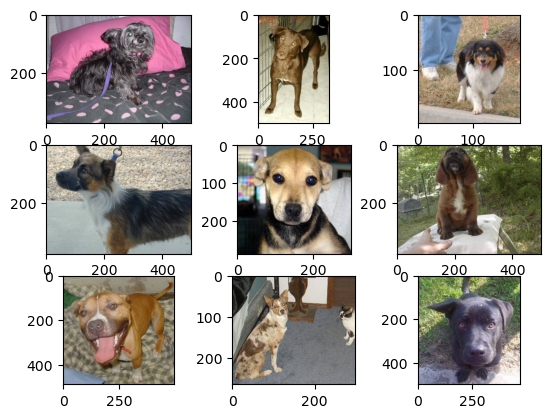

(3178, 3072) (3178,)


C:\Users\uig35167\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\uig35167\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

LR: 54.470666 (0.025725)
LDA: 52.296193 (0.018671)
KNN: 54.909926 (0.028918)
CART: 53.650180 (0.027493)
NB: 56.105787 (0.020467)
SVM: 63.278575 (0.024326)
RF: 61.895224 (0.026428)


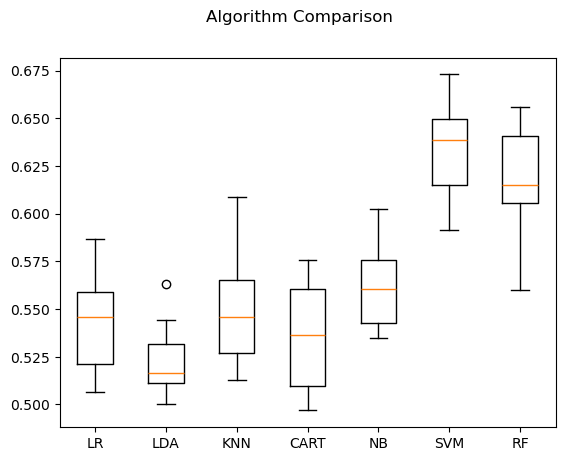

In [11]:
from os import listdir
from numpy import asarray
from numpy import save
from matplotlib import pyplot   
from matplotlib.image import imread
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

path ='C:/Users/uig35167/Desktop/Python/CN_PABD/Lab4/train'
def plot_images(label):
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # define filename
        filename = path +"\\"+ label + "\\" + label[:-1]+ '.' + str(i) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        pyplot.imshow(image)
    # show the figure
    pyplot.show()

plot_images('dogs')     
#plot_images('cats')    

#DOGS - CLASS 1
#CATS - CLASS 0
#image to array

def img_array():
    # define location of dataset
    photos, labels = list(), list()
    # enumerate files in the directory
    for file in listdir(path):
        # determine class
        if file == 'dogs':
                output = 1
        else:
                output = 0
        for image in listdir(path+"\\"+file):
            # load image
            photo = load_img(path+"\\"+file+"\\"+image, target_size=(32, 32))
            # convert image to numpy array
            photo = img_to_array(photo)
            # store
            photos.append(photo)
            labels.append(output)
    # convert to a numpy arrays
    photos = asarray(photos)
    labels = asarray(labels)
    print(photos.shape, labels.shape)
    # save the reshaped photos
    save('a_dogs_vs_cats_photos.npy', photos)
    save('a_dogs_vs_cats_labels.npy', labels)



# load 
from numpy import load
X = load('C:/Users/uig35167/Desktop/Python/CN_PABD/Lab4/a_dogs_vs_cats_photos')
Y = load('C:/Users/uig35167/Desktop/Python/CN_PABD/Lab4/a_dogs_vs_cats_labels')
#modelele 
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape, Y.shape)

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluarea fiecarui model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

